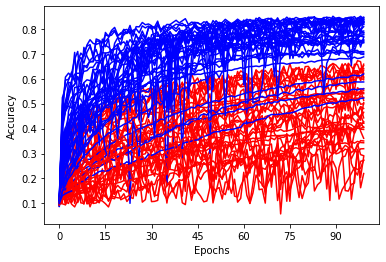

In [1]:
from turtle import color
from ray.tune import ExperimentAnalysis
from matplotlib.ticker import MaxNLocator
analysis = ExperimentAnalysis("./results/temp_experiment2")

def plot(analysis, show_ece=0):
    ax = None
    dfs = analysis.trial_dataframes
    for k, d in dfs.items():
        if "v01" in k:
            if show_ece:
                ax = d.ece.plot(ax=ax, legend=False, color="red")
            else:
                ax = d.accuracy.plot(ax=ax, legend=False, color="red")
        else:
            if show_ece:
                ax = d.ece.plot(ax=ax, legend=False, color="blue")
            else:
                ax = d.accuracy.plot(ax=ax, legend=False, color="blue")
    ax.set_xlabel("Epochs")
    if show_ece:
        ax.set_ylabel("ECE")
    else:
        ax.set_ylabel("Accuracy")
    # set x axis to be integers
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plot(analysis, show_ece=0)


In [6]:
from ray.tune import ExperimentAnalysis
analysis = ExperimentAnalysis("./results/temp_experiment2")
a = analysis.dataframe().sort_values("accuracy", ascending=False)
a = a.drop(columns=['timesteps_total','episodes_total', 'training_iteration', 
'trial_id', 'experiment_id','date', 'timestamp', 'time_total_s', 'pid', 
'hostname', 'node_ip','time_since_restore', 'timesteps_since_restore',
'warmup_time', 'logdir'])

Couldn't read config from 3 paths


In [27]:
a[a['config/criterion']=="CrossEntropyLoss()"].sort_values("accuracy", ascending=False)

,accuracy,ece,time_this_iter_s,done,iterations_since_restore,config/batch_size,config/criterion,config/lr,config/model
24,0.8462,0.066015,38.719682,True,100,100,CrossEntropyLoss(),0.00050,<function resnet50 at 0x7f34632fac20>
40,0.8454,0.065917,71.238518,True,100,100,CrossEntropyLoss(),0.00100,<function resnet101 at 0x7f34632fadd0>
44,0.8400,0.069392,62.587855,True,100,100,CrossEntropyLoss(),0.00050,<function resnet101 at 0x7f34632fadd0>
20,0.8389,0.067286,44.198434,True,100,100,CrossEntropyLoss(),0.00100,<function resnet50 at 0x7f34632fac20>
21,0.8372,0.057013,30.055522,True,100,200,CrossEntropyLoss(),0.00100,<function resnet50 at 0x7f34632fac20>
4,0.8345,0.063888,25.100562,True,100,100,CrossEntropyLoss(),0.00050,<function resnet18 at 0x7f34632fa8c0>
1,0.8294,0.058330,18.644080,True,100,200,CrossEntropyLoss(),0.00100,<function resnet18 at 0x7f34632fa8c0>
25,0.8289,0.058297,31.378286,True,100,200,CrossEntropyLoss(),0.00050,<function resnet50 at 0x7f34632fac20>
5,0.8274,0.057559,18.862885,True,100,200,CrossEntropyLoss(),0.00050,<function resnet18 at 0x7f34632fa8c0>
65,0.8260,0.061286,70.850748,True,100,200,CrossEntropyLoss(),0.00050,<function resnet152 at 0x7f34632faf80>


In [ ]:
from wsgiref import validate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

torch.cuda.empty_cache()

def load_data(batch_size=100):
    transform = transforms.Compose([
        transforms.Pad(4),
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32),
        transforms.ToTensor()])

    train_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                                 train=True, 
                                                 transform=transform,
                                                 download=True)

    test_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                                train=False, 
                                                transform=transforms.ToTensor())

    train_loader = torch.utils.data.DataLoader(batch_size=batch_size, 
                                            dataset=train_dataset, 
                                            shuffle=True)
    test_loader = torch.utils.data.DataLoader(batch_size=batch_size,
                                            dataset=test_dataset,
                                            shuffle=False)
    return train_loader, test_loader

train_loader, test_loader = load_data()

def test(model, test_loader, device="cpu"):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

resnet101 = models.resnet101(num_classes=10).to(device)

optimizer = torch.optim.Adam(resnet101.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

print("Accuracy:", test(resnet101, test_loader, device=device))

#training loop
for epoch in range(5):
    print("Epoch:", epoch)
    resnet101.train(True)
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = resnet101(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Accuracy:", test(resnet101, test_loader, device=device))